<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter4/Data_Preprocessing_7_Under_Over_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples = 2000, n_features = 6, weights = [0.95], flip_y = 0, random_state=123)
print(x)
print(Counter(y))

[[-0.80760066  0.02462501 -0.39892949  0.1916554  -0.53285496 -0.33581551]
 [ 0.05545358 -1.23260121 -1.4355057   0.95428685 -1.74358576  0.85921528]
 [-0.41799128  0.31787398 -0.56846429  0.33858718 -1.36202734  0.03309579]
 ...
 [-0.7914995   0.23662156  0.50945074 -0.40763775  0.21851463 -0.84378221]
 [-0.90723459 -0.57863763 -0.51243833  0.25781823  0.66657746 -0.340497  ]
 [-1.12344462 -0.44311706  1.14217956 -0.85573721  0.6801492  -1.43718503]]
Counter({0: 1900, 1: 100})


## Random Under Sampling

In [22]:
undersample = RandomUnderSampler(sampling_strategy = 'majority')

x_under, y_under = undersample.fit_resample(x,y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [23]:
undersample = RandomUnderSampler(sampling_strategy = 0.5)
x_under2, y_under2 = undersample.fit_resample(x,y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


## Random Over Sampling

In [24]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x,y)

print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [25]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over2, y_over2 = oversample.fit_resample(x,y)
print(Counter(y_over2))

Counter({0: 1900, 1: 1900})


## SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote_sample.fit_resample(x,y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


## 조정 결과

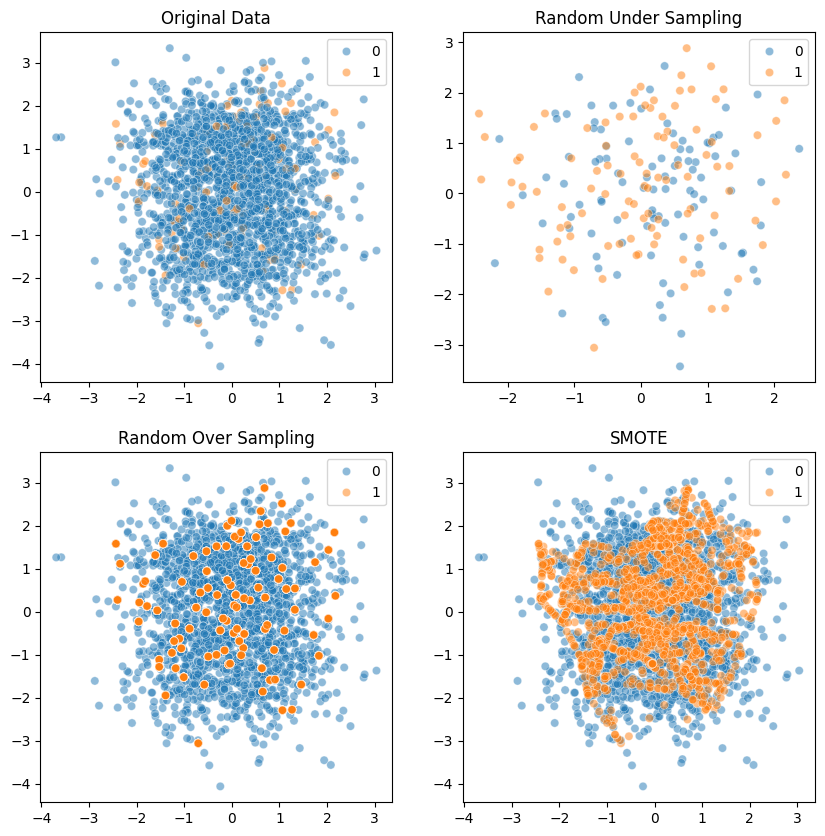

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.scatterplot(x = x[:,1], y = x[:,2], hue = y, ax = axes[0][0], alpha = 0.5)
sns.scatterplot(x = x_under[:,1], y = x_under[:,2], hue = y_under, ax = axes[0][1], alpha = 0.5)
sns.scatterplot(x = x_over2[:,1], y = x_over2[:,2], hue = y_over2, ax = axes[1][0], alpha = 0.5)
sns.scatterplot(x = x_sm[:,1], y = x_sm[:,2], hue = y_sm, ax = axes[1][1], alpha = 0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')
plt.show()